In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load and clean the dataset
df = pd.read_excel("hypothetical_finance_data.xlsx")

In [8]:
# Data Cleaning
df['Credit_Score'].fillna(df['Credit_Score'].median())
df['Income'].fillna(df['Income'].mean())
df['Loan_Status'] = df['Loan_Status'].replace('unknown', 'Pending')
df.drop_duplicates()
df['Application_Date'] = pd.to_datetime(df['Application_Date'])

In [10]:
# Display basic info
print("Basic Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       100 non-null    object        
 1   Credit_Score      100 non-null    float64       
 2   Income            100 non-null    float64       
 3   Loan_Amount       100 non-null    float64       
 4   Loan_Term_Months  100 non-null    int64         
 5   Interest_Rate     100 non-null    float64       
 6   Loan_Status       100 non-null    object        
 7   Defaulted         100 non-null    int64         
 8   Application_Date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 7.2+ KB
None

Summary Statistics:
       Credit_Score         Income   Loan_Amount  Loan_Term_Months  \
count    100.000000     100.000000    100.000000         100.00000   
mean     568.630000   61383.328737  15798.52

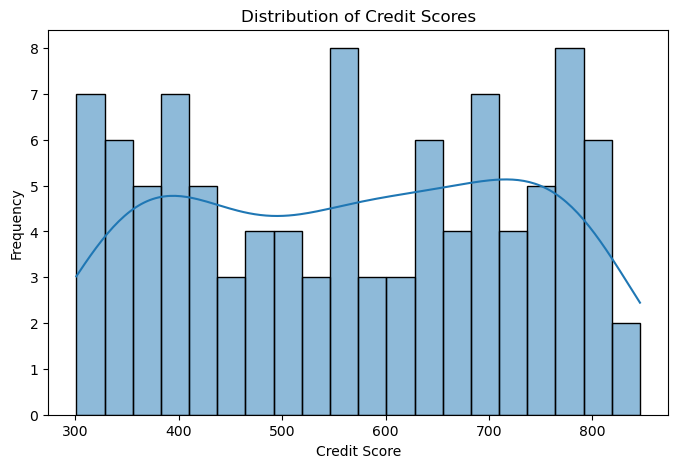

In [12]:
# 1. Credit Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Credit_Score'], bins=20, kde=True)
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

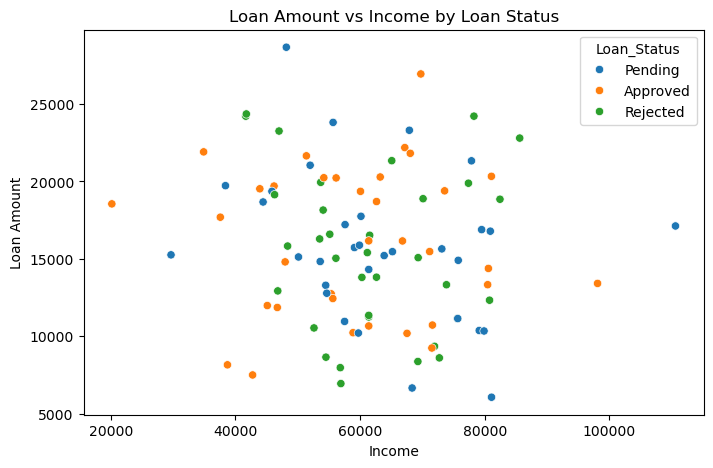

In [14]:
# 2. Loan Amount vs Income Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='Loan_Amount', hue='Loan_Status', data=df)
plt.title("Loan Amount vs Income by Loan Status")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.show()

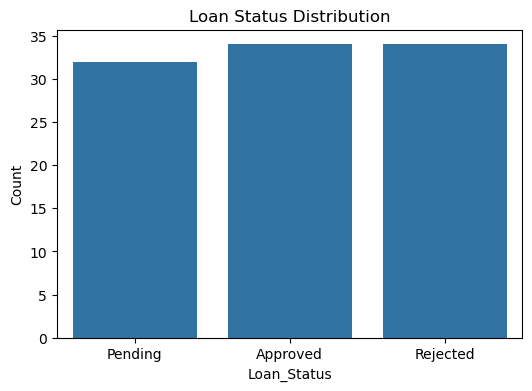

In [16]:
# 3. Loan Status Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.ylabel("Count")
plt.show()

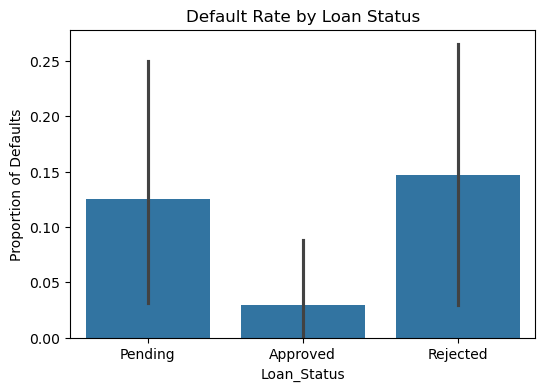

In [18]:
# 4. Default Rate by Loan Status
plt.figure(figsize=(6, 4))
sns.barplot(x='Loan_Status', y='Defaulted', data=df)
plt.title("Default Rate by Loan Status")
plt.ylabel("Proportion of Defaults")
plt.show()

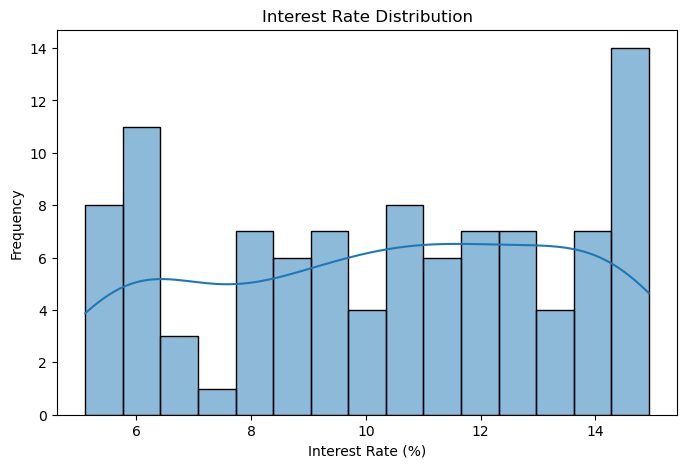

In [20]:
# 5. Interest Rate Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Interest_Rate'], bins=15, kde=True)
plt.title("Interest Rate Distribution")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()


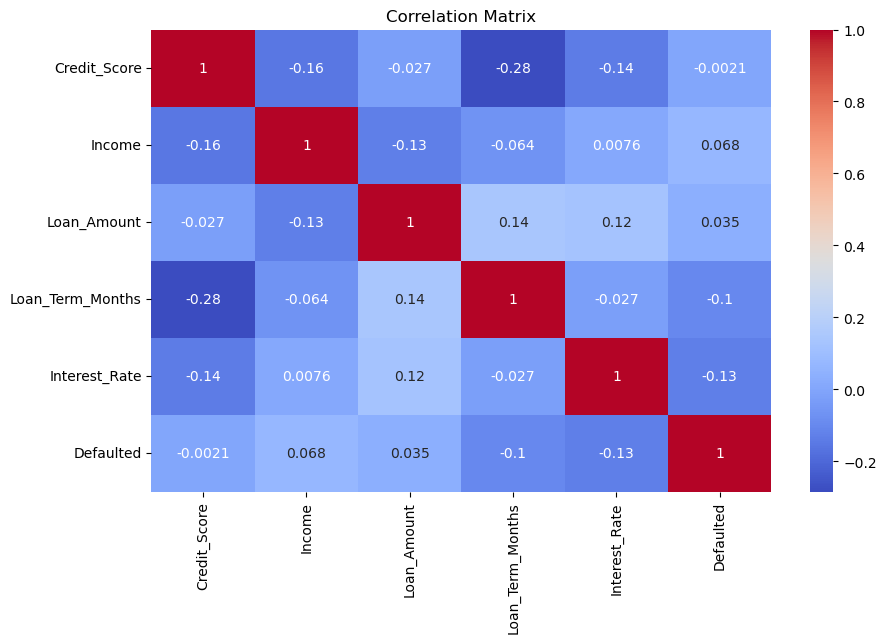

In [22]:
# 6. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

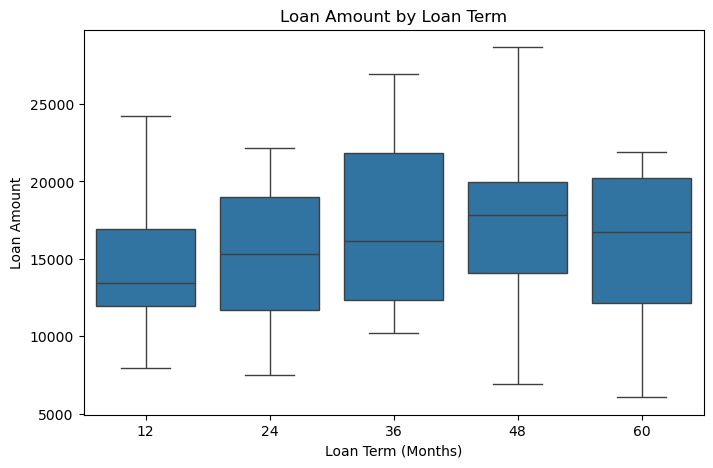

In [24]:
# 7. Boxplot: Loan Amount by Loan Term
plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Term_Months', y='Loan_Amount', data=df)
plt.title("Loan Amount by Loan Term")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Loan Amount")
plt.show()

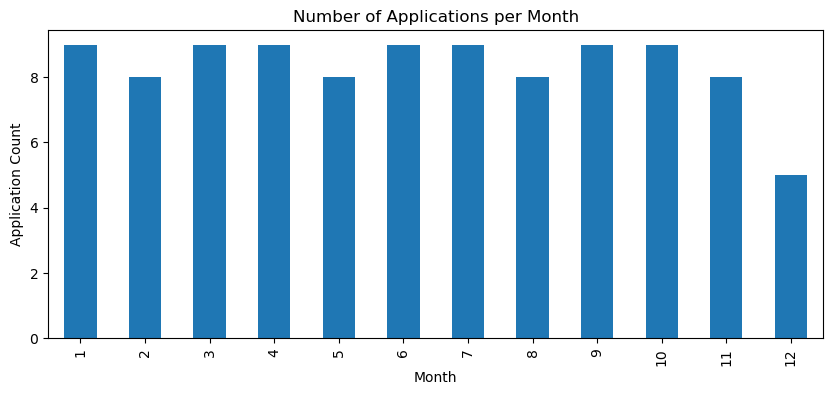

In [26]:
# 8. Time Trend: Applications Over Time
plt.figure(figsize=(10, 4))
df['Application_Date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title("Number of Applications per Month")
plt.xlabel("Month")
plt.ylabel("Application Count")
plt.show()